<a href="https://colab.research.google.com/github/SAMMOSES26/projects/blob/main/customer_conversion_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# **dataset**

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


# **preprocessing data**

In [4]:
df.shape

(45211, 11)

In [5]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [6]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [7]:
df=df.drop_duplicates()

In [8]:
df.shape

(45205, 11)

In [9]:
df.nunique()

age                 77
job                 12
marital              3
education_qual       4
call_type            3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         4
y                    2
dtype: int64

In [10]:
df['job'].value_counts()

blue-collar      9730
management       9457
technician       7596
admin.           5170
services         4153
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

mode imputation for unknown column

In [11]:
# imputed unknown values with mode

mode_job = df['job'].mode()[0]
df['job']=df['job'].replace("unknown",mode_job)

<ipython-input-11-b82785123eb2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['job']=df['job'].replace("unknown",mode_job)


In [12]:
df['job'].value_counts()

blue-collar      10018
management        9457
technician        7596
admin.            5170
services          4153
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: job, dtype: int64

In [13]:
df['marital'].value_counts()

married     27210
single      12788
divorced     5207
Name: marital, dtype: int64

In [14]:
df['education_qual'].value_counts()

secondary    23199
tertiary     13299
primary       6850
unknown       1857
Name: education_qual, dtype: int64

mode imputation for education_qual

In [15]:
#mode imputing 

mode_education_qual=df['education_qual'].mode()[0]
df['education_qual']=df['education_qual'].replace("unknown",mode_education_qual)

In [16]:
df['education_qual'].value_counts()

secondary    25056
tertiary     13299
primary       6850
Name: education_qual, dtype: int64

In [17]:
df['call_type'].value_counts()

cellular     29282
unknown      13017
telephone     2906
Name: call_type, dtype: int64

there are lot unknown values so we are not going to impute them we'r going to consider that as a seprate column

In [18]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1840
28    1829
7     1817
19    1756
29    1745
15    1703
12    1603
13    1585
30    1566
9     1560
11    1479
4     1445
16    1415
2     1292
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [19]:
df['mon'].value_counts()

may    13765
jul     6894
aug     6245
jun     5339
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [20]:
df['dur'].value_counts()

124     187
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [21]:
df['num_calls'].value_counts()

1     17542
2     12503
3      5521
4      3520
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [22]:
df['prev_outcome'].value_counts()

unknown    36953
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

here also we not imputing . lots of unknown values . so we are going to consider unknown values as type here

**outlier**

In [23]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [24]:
iqr=df['dur'].quantile(0.75) - df['dur'].quantile(0.25)
upper_threshold=df['dur'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['dur'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(643.0, -221.0)

In [25]:
df.dur=df.dur.clip(643.0, -221.0)

In [26]:
iqr=df['num_calls'].quantile(0.75) - df['num_calls'].quantile(0.25)
upper_threshold=df['num_calls'].quantile(0.75) + (1.5 * iqr)
lower_threshold=df['num_calls'].quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(6.0, -2.0)

In [27]:
df.num_calls=df.num_calls.clip(6.0, -2.0)

In [28]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.937087,15.80688,234.95620,2.392235
std,10.619130,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,95.000000,31.00000,643.00000,6.000000


In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
df['target']=df['y'].map({'yes':1,'no':0})

In [31]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y', 'target'],
      dtype='object')

In [32]:
df.groupby('job')['target'].mean()

job
admin.           0.122050
blue-collar      0.074067
entrepreneur     0.082717
housemaid        0.087903
management       0.137570
retired          0.227915
self-employed    0.118429
services         0.088851
student          0.286780
technician       0.110585
unemployed       0.155027
Name: target, dtype: float64

In [33]:
df.groupby('marital')['target'].mean()

marital
divorced    0.119455
married     0.101250
single      0.149515
Name: target, dtype: float64

In [34]:
df.groupby('education_qual')['target'].mean()

education_qual
primary      0.086277
secondary    0.107838
tertiary     0.150086
Name: target, dtype: float64

In [35]:
df.groupby('call_type')['target'].mean()

call_type
cellular     0.149204
telephone    0.134205
unknown      0.040716
Name: target, dtype: float64

In [36]:
df.groupby('mon')['target'].mean()

mon
apr    0.196794
aug    0.110168
dec    0.467290
feb    0.166478
jan    0.101212
jul    0.090949
jun    0.102266
mar    0.519916
may    0.067199
nov    0.101511
oct    0.437669
sep    0.464594
Name: target, dtype: float64

In [37]:
df.groupby('prev_outcome')['target'].mean()

prev_outcome
failure    0.126097
other      0.166848
success    0.647253
unknown    0.091630
Name: target, dtype: float64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45205 non-null  int64  
 1   job             45205 non-null  object 
 2   marital         45205 non-null  object 
 3   education_qual  45205 non-null  object 
 4   call_type       45205 non-null  object 
 5   day             45205 non-null  int64  
 6   mon             45205 non-null  object 
 7   dur             45205 non-null  float64
 8   num_calls       45205 non-null  float64
 9   prev_outcome    45205 non-null  object 
 10  y               45205 non-null  object 
 11  target          45205 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


# **EDA**

in eda 2 plots are important

* distribution of feature plot --> to see how is my feature distributed
* feature vs target plot --> to find relationship between feature nd target

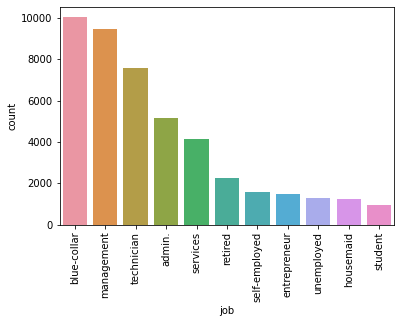

In [39]:
df_j =pd.DataFrame(df.job.value_counts()).sort_values("job",ascending=False).reset_index()
df_j.rename(columns={"index":"job","job":"count"}, inplace=True)
bar=sns.barplot(x=df_j["job"],y=df_j["count"],data=df_j)
bar.tick_params(axis="x" ,rotation=90)

<Axes: ylabel='job'>

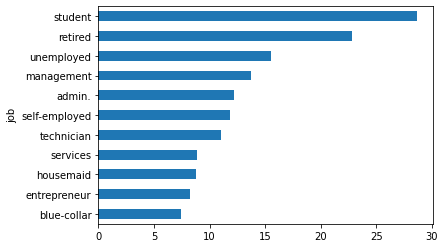

In [40]:
(df.groupby("job")['target'].mean()*100).sort_values().plot(kind="barh")

ordered relationship here so do label encoding

<Axes: ylabel='marital'>

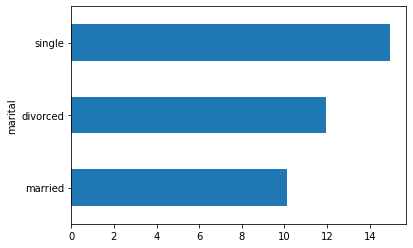

In [41]:
(df.groupby("marital")['target'].mean()*100).sort_values().plot(kind="barh")

ordered relationship here so do label encoding

<Axes: ylabel='education_qual'>

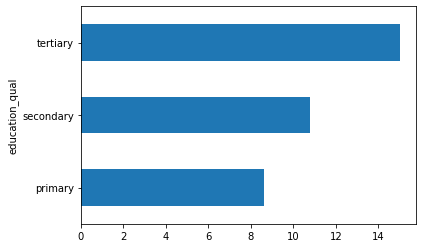

In [42]:
(df.groupby("education_qual")['target'].mean()*100).sort_values().plot(kind="barh")

<Axes: ylabel='call_type'>

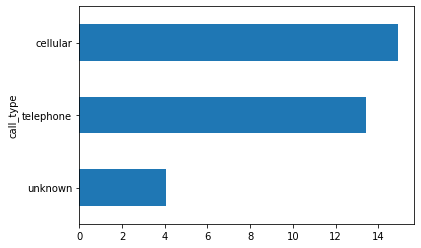

In [43]:
(df.groupby("call_type")['target'].mean()*100).sort_values().plot(kind="barh")

<Axes: ylabel='mon'>

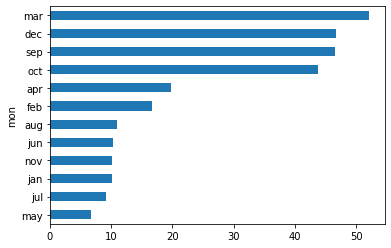

In [44]:
(df.groupby("mon")['target'].mean()*100).sort_values().plot(kind="barh")

<Axes: ylabel='prev_outcome'>

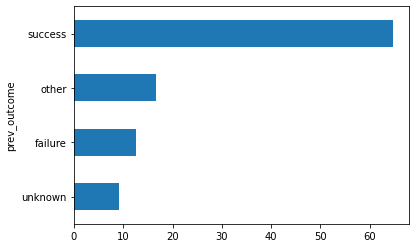

In [45]:
(df.groupby("prev_outcome")['target'].mean()*100).sort_values().plot(kind="barh")

we do this above plotting for 3 reasons 

1. to find is this feature important
2. is there order in data
3. what sort of encoding to do

plot between continus feature vs target

In [46]:
# sns.boxplot(x="y", y="age", data=df)

In [47]:
# sns.countplot(x=df.y,data=df)
# plt.xlabel("target")
# plt.title("count of target variable")
# plt.plot

# **Encoding**

In [48]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y,target
0,58,management,married,tertiary,unknown,5,may,261.0,1.0,unknown,no,0
1,44,technician,single,secondary,unknown,5,may,151.0,1.0,unknown,no,0
2,33,entrepreneur,married,secondary,unknown,5,may,76.0,1.0,unknown,no,0
3,47,blue-collar,married,secondary,unknown,5,may,92.0,1.0,unknown,no,0
4,33,blue-collar,single,secondary,unknown,5,may,198.0,1.0,unknown,no,0


In [49]:
#job encoding
df.job=df.job.map({'blue-collar':0,'entrepreneur':1,'housemaid':2,'services':3,'technician':4,'self-employed':5,'admin.':6,'management':7,'unemployed':8,'retired':9,'student':10})

In [50]:
#marital encoding
df.marital=df.marital.map({'married':0,'divorced':1,'single':2})

In [51]:
#education_qual encoding
df.education_qual=df.education_qual.map({'primary':0,'secondary':1,'tertiary':2})

In [52]:
#call_type encoding
df.call_type=df.call_type.map({'unknown':0,'telephone':1,'cellular':2})

In [53]:
#mon encoding
df.mon=df.mon.map({'may':0,'jul':1,'jan':2,'nov':3,'jun':4,'aug':5,'feb':6,'apr':7,'oct':8,'sep':9,'dec':10,'mar':11})

In [54]:
#prev_outcome encoding
df.prev_outcome=df.prev_outcome.map({'unknown':0,'failure':1,'other':2,'success':3})

# **splitting**

In [55]:
#encoded y (target column) to target so dropped y
df=df.drop(['y'], axis=1)

In [56]:
X = df.loc[:, df.columns != 'target']
y = df['target']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

# **balancing**

In [58]:
df.shape

(45205, 11)

In [59]:
df['target'].value_counts()

0    39916
1     5289
Name: target, dtype: int64

In [60]:
# target_count = df.target.value_counts()
# print('Class 0:', target_count[0])
# print('Class 1:', target_count[1])
# print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

# sns.countplot(x=df.target,data=df)
# plt.xlabel("target")
# plt.title("count of target variable")
# plt.plot

data is imbalance because more than 70 % data belongs to one class

In [61]:
#balancing data
from imblearn.combine import SMOTEENN
smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train,y_train)

In [62]:
# target_count = y_smt.value_counts()
# print('Class 0:', target_count[0])
# print('Class 1:', target_count[1])
# print('Proportion of class 0 is ', round(target_count[0] * 100 / (target_count[1] + target_count[0]), 2),'%')

# sns.countplot(x=y_smt)
# plt.xlabel("target")
# plt.title("count of target variable")
# plt.plot

# **scaling**

**scaling is confusing fit transform is balanced train data**

**transform is unbalanced test data**

In [63]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_scaled = std.fit_transform(X_smt)
X_test_scaled = std.transform(X_test)

In [64]:
X_train_scaled


array([[ 0.23657665,  0.87717437,  1.60040755, ..., -0.0038111 ,
        -0.15715838, -0.50049071],
       [ 0.15176472,  0.87717437, -0.75481469, ..., -0.34796133,
         0.53668279,  0.73247297],
       [-0.44191882, -0.86668555,  0.42279643, ...,  0.1969432 ,
        -0.85099955, -0.50049071],
       ...,
       [ 0.91507212, -1.56422952,  0.42279643, ...,  1.57832397,
        -0.50519249, -0.50049071],
       [-0.61154269, -1.56422952,  1.60040755, ...,  1.08701999,
        -0.00880056, -0.50049071],
       [ 1.67837952,  1.22594635, -0.75481469, ...,  1.57832397,
         0.0774604 , -0.50049071]])

# **logistic** **regression**

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression() 
lr.fit(X_train_scaled,y_smt)
lr.score(X_test_scaled,y_test)
# y_pred=lr.predict(X_test_scaled)
log=roc_auc_score(y_test,lr.predict_proba(X_test_scaled)[:,-1])

In [66]:
print(log)

0.891417740571779


# **knn**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

KNN =KNeighborsClassifier()
KNN.fit(X_train_scaled,y_smt)
KNN.score(X_test_scaled,y_test)

0.7872942841974871

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,20]:
  KNN= KNeighborsClassifier(n_neighbors=i) #initialising the model
  KNN.fit(X_train_scaled,y_smt) # training the model
  print("K value  : " , i, " Accuracy Score : ", KNN.score(X_train_scaled,y_smt) , " cv score : ", np.mean(cross_val_score(KNN, X_train_scaled, y_smt, cv=10)))

K value  :  1  Accuracy Score :  1.0  cv score :  0.9408678852268617
K value  :  2  Accuracy Score :  0.9841533147284401  cv score :  0.9296856419337025
K value  :  3  Accuracy Score :  0.9638765832048555  cv score :  0.9338032215685155
K value  :  4  Accuracy Score :  0.9612224585780917  cv score :  0.9300562479769997
K value  :  5  Accuracy Score :  0.9517573817841182  cv score :  0.9279485158317625
K value  :  6  Accuracy Score :  0.9497082414472785  cv score :  0.9269923154547705
K value  :  7  Accuracy Score :  0.9442438672157062  cv score :  0.9249236229317797
K value  :  8  Accuracy Score :  0.944204835971195  cv score :  0.9235771291483406
K value  :  9  Accuracy Score :  0.9391698054292461  cv score :  0.9220938786390207
K value  :  10  Accuracy Score :  0.9374133994262407  cv score :  0.9211961958073914
K value  :  20  Accuracy Score :  0.9232255420464082  cv score :  0.914346143447383


In [69]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_scaled,y_smt)
knn.score(X_test,y_test)

0.11413909042647319

# **decision tree**

In [73]:
# from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
# from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
# import numpy as np

# for depth in [1,2,3,4,5,6,7,8,9,10,20,50]:
#   dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
#   # Fit dt to the training set
#   dt.fit(X_train, y_train) # the model is trained
#   trainAccuracy = accuracy_score(y_train, dt.predict(X_train)) # this is useless information - i am showing to prove a point
#   dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
#   valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
#   print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

In [71]:
# from sklearn.tree import DecisionTreeClassifier
 
# dt = DecisionTreeClassifier()

# # Fit dt to the training set
# dt.fit(X_train, y_train) 

# # Predict test set labels
# y_pred = dt.predict(X_test)
# y_pred

**auroc score**

In [72]:
# dt_auroc = roc_auc_score(y_test, y_pred)
# print("dt_auroc: ",dt_auroc)